In [1]:
from PIL import Image
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time
import requests
import pandas as pd

In [2]:
html = requests.get('https://www.maccosmetics.co.kr/products/13854/makeup')
soup = BeautifulSoup(html.text, 'html.parser')
product_urls = soup.find_all('a', 'product__name-link js-product__link-to-spp product_header_name')

In [3]:
names = []
prices = []
colors = []
rgbs = []
for data in product_urls:
    url = "https://www.maccosmetics.co.kr" +  data['href']
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    tmp= soup.find('ul', 'shade-picker__colors')
    
    if not tmp:
        continue
    
    for color, rgb in zip(tmp.find_all('div', 'shade-picker__color-name'),tmp.find_all('div', 'shade-picker__color-chip')):
        names.append(soup.find('h3', 'product__subline').get_text())
        prices.append(soup.find('span', 'product__price--standard').get_text()[2:])
        colors.append(color.get_text())
        rgbs.append(rgb['style'].split(' ')[1][:-1])
        
names[0], prices[0], colors[0], rgbs[0] 

('러브 미 립스틱', '31,000', '기브 미 피버 \xa0크림', '#b50327')

In [4]:
mac = pd.DataFrame({'상품명' : names,
                 '가격' : prices,
                 '색상': colors,
                  'rgb': rgbs}, columns=['상품명', '가격', '색상', 'rgb'])

In [5]:
mac

,상품명,가격,색상,rgb
0,러브 미 립스틱,"31,000",기브 미 피버 크림,#b50327
1,러브 미 립스틱,"31,000",라제-페어 크림,#c57b78
2,러브 미 립스틱,"31,000",이 포 에포트리스 크림,#850d00
3,러브 미 립스틱,"31,000",몽 쾨르 크림,#9d3453
4,러브 미 립스틱,"31,000",쉐임리스리 베인 크림,#da3517
5,러브 미 립스틱,"31,000",킬링 미 소프틀리 크림,#914957
6,러브 미 립스틱,"31,000",라 팜므 크림,#500919
7,러브 미 립스틱,"31,000",애즈 이프 아이 케어 크림,#a54254
8,러브 미 립스틱,"31,000",나인 라이브즈 크림,#b90141
9,러브 미 립스틱,"31,000",조아 드 비브르 크림,#842359


In [6]:
r=[]
g=[]
b=[]

for n in range(len(mac['rgb'])):
    r.append(int(mac['rgb'][n][1:3],16))
    g.append(int(mac['rgb'][n][3:5],16))
    b.append(int(mac['rgb'][n][5:7],16))
    
mac['R']=r
mac['G']=g
mac['B']=b
mac

,상품명,가격,색상,rgb,R,G,B
0,러브 미 립스틱,"31,000",기브 미 피버 크림,#b50327,181,3,39
1,러브 미 립스틱,"31,000",라제-페어 크림,#c57b78,197,123,120
2,러브 미 립스틱,"31,000",이 포 에포트리스 크림,#850d00,133,13,0
3,러브 미 립스틱,"31,000",몽 쾨르 크림,#9d3453,157,52,83
4,러브 미 립스틱,"31,000",쉐임리스리 베인 크림,#da3517,218,53,23
5,러브 미 립스틱,"31,000",킬링 미 소프틀리 크림,#914957,145,73,87
6,러브 미 립스틱,"31,000",라 팜므 크림,#500919,80,9,25
7,러브 미 립스틱,"31,000",애즈 이프 아이 케어 크림,#a54254,165,66,84
8,러브 미 립스틱,"31,000",나인 라이브즈 크림,#b90141,185,1,65
9,러브 미 립스틱,"31,000",조아 드 비브르 크림,#842359,132,35,89


In [7]:
rgb = []
for r,g,b in zip(mac['R'], mac['G'], mac['B']):
    rgb.append([r,g,b])
mac['RGB'] = rgb

In [8]:
mac

,상품명,가격,색상,rgb,R,G,B,RGB
0,러브 미 립스틱,"31,000",기브 미 피버 크림,#b50327,181,3,39,"[181, 3, 39]"
1,러브 미 립스틱,"31,000",라제-페어 크림,#c57b78,197,123,120,"[197, 123, 120]"
2,러브 미 립스틱,"31,000",이 포 에포트리스 크림,#850d00,133,13,0,"[133, 13, 0]"
3,러브 미 립스틱,"31,000",몽 쾨르 크림,#9d3453,157,52,83,"[157, 52, 83]"
4,러브 미 립스틱,"31,000",쉐임리스리 베인 크림,#da3517,218,53,23,"[218, 53, 23]"
5,러브 미 립스틱,"31,000",킬링 미 소프틀리 크림,#914957,145,73,87,"[145, 73, 87]"
6,러브 미 립스틱,"31,000",라 팜므 크림,#500919,80,9,25,"[80, 9, 25]"
7,러브 미 립스틱,"31,000",애즈 이프 아이 케어 크림,#a54254,165,66,84,"[165, 66, 84]"
8,러브 미 립스틱,"31,000",나인 라이브즈 크림,#b90141,185,1,65,"[185, 1, 65]"
9,러브 미 립스틱,"31,000",조아 드 비브르 크림,#842359,132,35,89,"[132, 35, 89]"


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [10]:
X = np.array(rgb)
X.shape

(360, 3)

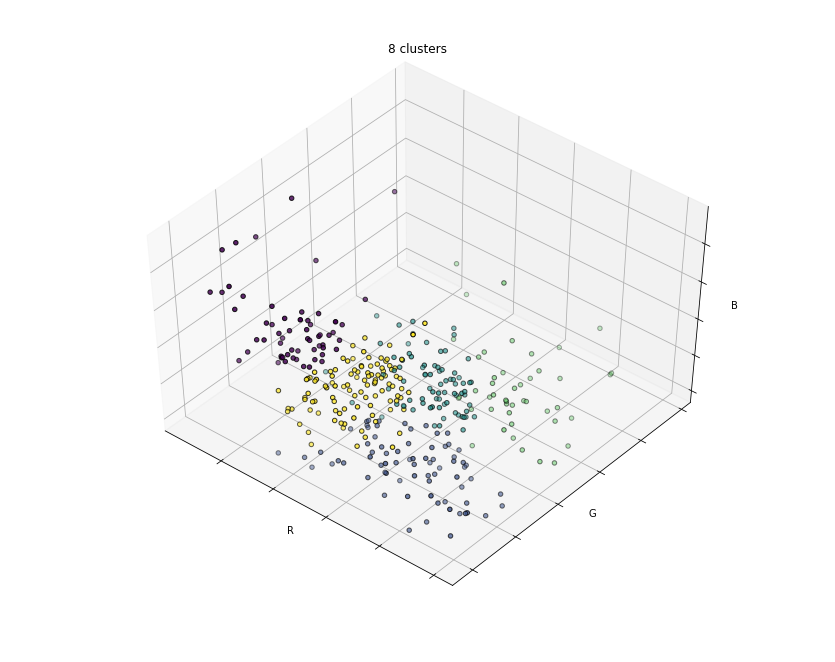

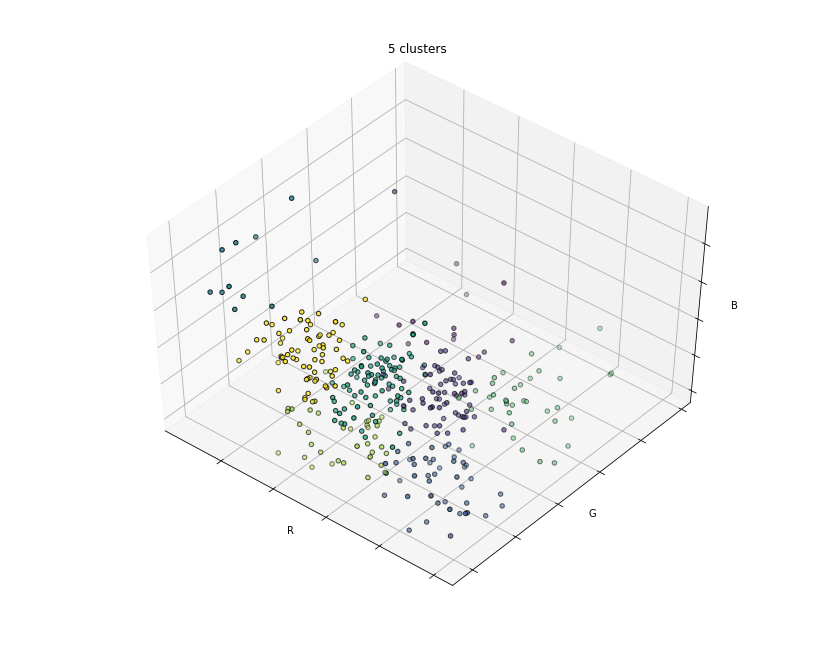

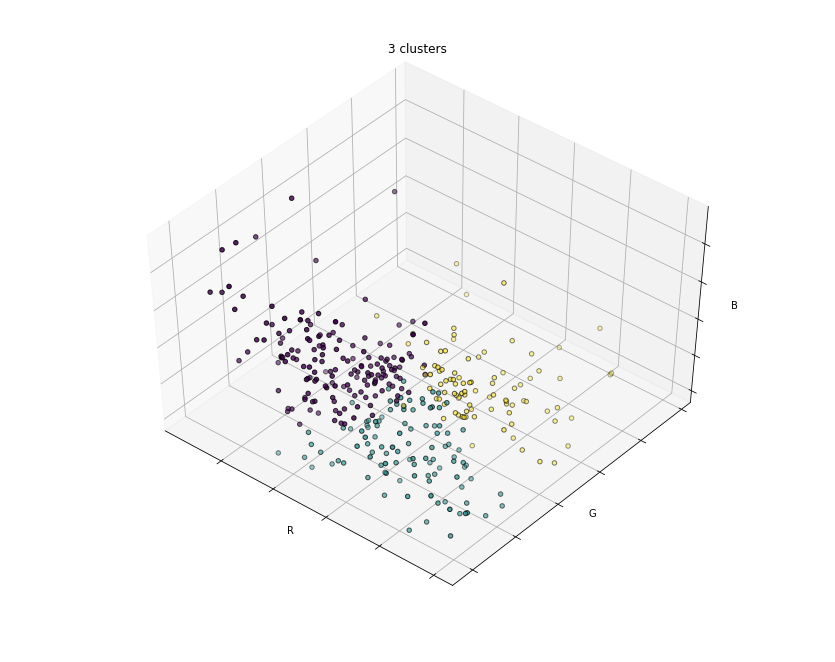

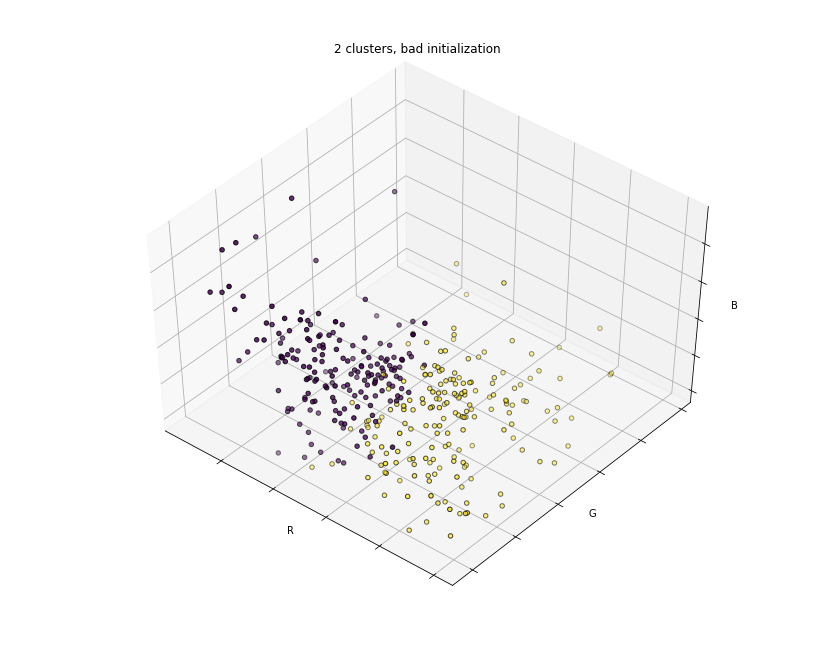

In [13]:
estimators = [('k_means_iris_8', KMeans(n_clusters=5)),
              ('k_means_iris_5', KMeans(n_clusters=8)),
               ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=2, n_init=1,
                                               init='random'))]
fignum = 1
titles = ['8 clusters', '5 clusters','3 clusters', '2 clusters, bad initialization']

xmin = 0
xmax = 255
ymin = 0
ymax = 255
zmin = 0
zmax = 125

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50, azim=130)
    est.fit(X)
    labels = est.labels_
    
    ax.scatter(X[:, 2], X[:, 0], X[:, 1],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1